$s$

In [1]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v5_vehicles
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()

In [2]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [3]:
m.joints

jcl_uca_rev    <constraints.revolute object at 0x000001FBCBB8...
jcr_uca_rev    <constraints.revolute object at 0x000001FBD2C9...
dtype: object

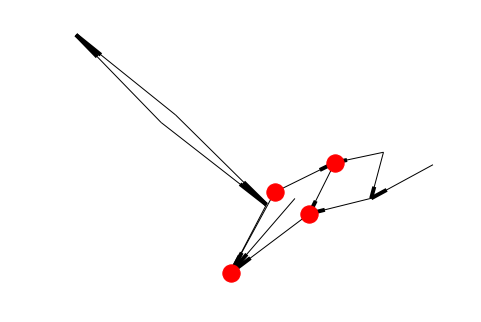

In [11]:

nx.draw_spring(m.data_flow,nodelist=list(nx.all_simple_paths(m.data_flow,'hpl_ucaf','jcl_uca_rev'))[0])
nx.Graph()

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

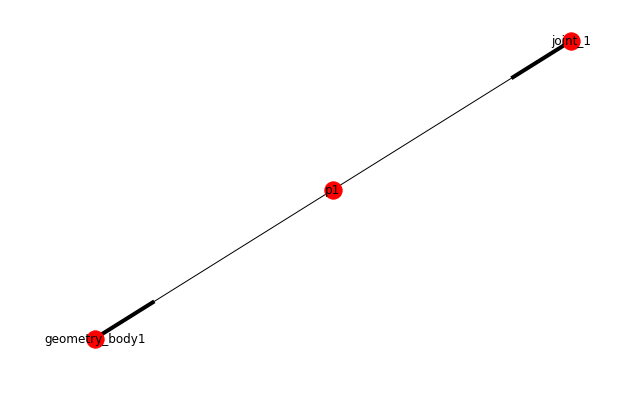

In [5]:
dep = nx.DiGraph()
dep.add_node('p1')
dep.add_edge('p1','geometry_body1')
dep.add_edge('p1','joint_1')

plt.figure(figsize=(8,5))
nx.draw_spring(dep,with_labels=True)
plt.show()

In [6]:
dep_geo = nx.DiGraph()
dep_geo.add_edge('geometry_body1','body1')


In [7]:
dep_joint = nx.DiGraph()
dep_joint.add_edge('p1','joint_1')
dep_joint.add_edge('body1','joint_1')
dep_joint.add_edge('body2','joint_1')

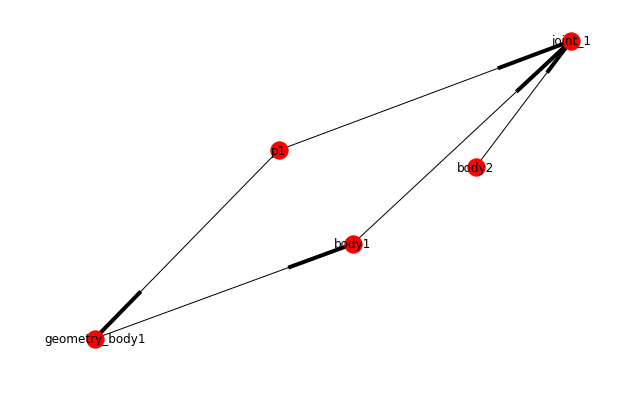

In [8]:
dep_all = nx.compose_all([dep,dep_geo,dep_joint])
plt.figure(figsize=(8,5))
nx.draw_spring(dep_all,with_labels=True)
plt.show()

In [10]:
list(nx.all_simple_paths(dep_all,'p1','joint_1'))

[['p1', 'geometry_body1', 'body1', 'joint_1'], ['p1', 'joint_1']]

In [19]:
dep_all.add_node('p2',l=[1,2,3])

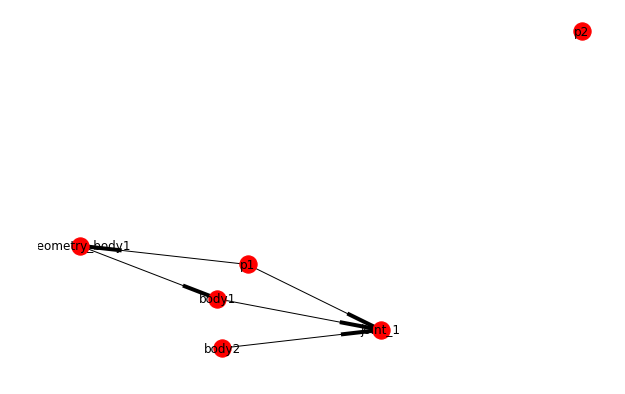

In [15]:
plt.figure(figsize=(8,5))
nx.draw_spring(dep_all,with_labels=True)
plt.show()

In [22]:
dep_all.nodes

NodeView(('p1', 'geometry_body1', 'joint_1', 'body1', 'body2', 'p2'))